# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


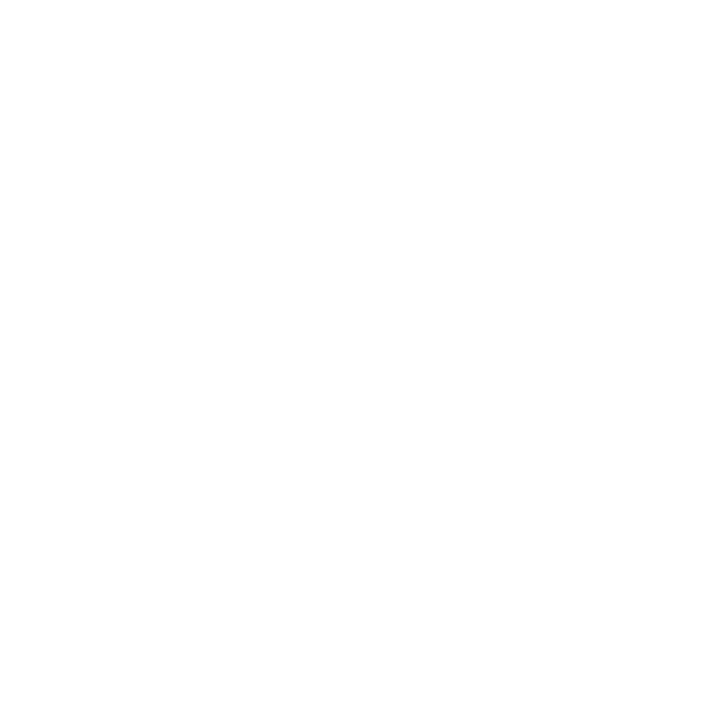

In [286]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [287]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df[df['Date']=='2005-11-11'].head()


,ID,Date,Element,Data_Value
3,USC00205563,2005-11-11,TMAX,139
383,USC00205563,2005-11-11,TMIN,0
1486,USC00200842,2005-11-11,TMAX,94
2040,USC00200842,2005-11-11,TMIN,-44
3828,USC00205450,2005-11-11,TMAX,133


In [288]:
#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(df['Date'])
date_index

DatetimeIndex(['2014-11-12', '2009-04-29', '2008-05-26', '2005-11-11',
               '2014-02-27', '2010-10-01', '2010-06-29', '2005-10-04',
               '2007-12-14', '2011-04-21',
               ...
               '2014-10-03', '2013-09-29', '2014-07-14', '2011-06-27',
               '2005-03-02', '2015-06-09', '2009-10-06', '2014-07-14',
               '2006-11-29', '2006-09-04'],
              dtype='datetime64[ns]', name='Date', length=165085, freq=None)

In [289]:
df.sort(['Date']).head()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [290]:
#Removing the leap days: Feb 29#Removin 
df = df[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [291]:
print(df.size)
df.shape

660008


(165002, 4)

In [292]:
#Refreshing the date_index after Removing the leap days
date_index = pd.DatetimeIndex(df['Date'])
date_index

DatetimeIndex(['2014-11-12', '2009-04-29', '2008-05-26', '2005-11-11',
               '2014-02-27', '2010-10-01', '2010-06-29', '2005-10-04',
               '2007-12-14', '2011-04-21',
               ...
               '2014-10-03', '2013-09-29', '2014-07-14', '2011-06-27',
               '2005-03-02', '2015-06-09', '2009-10-06', '2014-07-14',
               '2006-11-29', '2006-09-04'],
              dtype='datetime64[ns]', name='Date', length=165002, freq=None)

In [293]:
#The main index will be the Month-Day combination
df["Month"] = date_index.month
df["Day"] = date_index.day
df.head()

,ID,Date,Element,Data_Value,Month,Day
0,USW00094889,2014-11-12,TMAX,22,11,12
1,USC00208972,2009-04-29,TMIN,56,4,29
2,USC00200032,2008-05-26,TMAX,278,5,26
3,USC00205563,2005-11-11,TMAX,139,11,11
4,USC00200230,2014-02-27,TMAX,-106,2,27


In [294]:
#Checking if there is any 29 Feb
df[(df['Month'] == 2) & (df['Day']>28)]

,ID,Date,Element,Data_Value,Month,Day


In [295]:
df_2015 = df[date_index >= "2015-01-01"]
df = df[date_index < "2015-01-01"]

In [296]:
#The maximum temperatures records  
data_max = df[df["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_max = data_max / 10
data_max.head()

Month  Day
1      1      15.6
       2      13.9
       3      13.3
       4      10.6
       5      12.8
Name: Data_Value, dtype: float64

In [297]:
#The minimum temperatures records
data_min = df[df["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_min = data_min / 10
data_min.head()

Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
Name: Data_Value, dtype: float64

In [298]:
#The 2015 maximum temperatures records 
data_2015_max = df_2015[df_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()

Month  Day
1      1      1.1
       2      3.9
       3      3.9
       4      4.4
       5      2.8
Name: Data_Value, dtype: float64

In [299]:
#The 2015 minimum temperatures records
data_2015_min = df_2015[df_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

Month  Day
1      1     -13.3
       2     -12.2
       3      -6.7
       4      -8.8
       5     -15.5
Name: Data_Value, dtype: float64

In [300]:
#When where the records broken?
import numpy as np
max_rec_broken = (data_2015_max > data_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < data_min).as_matrix()
print(np.sum(min_rec_broken))

37
32


In [301]:
%matplotlib   inline
%matplotlib nbagg  
# Without this line the figure was not showing 
#and I used to get only <matplotlib.collections.PolyCollection at 0x7f7805db3828>
import matplotlib.pyplot as plt
import matplotlib as mpl

# dynamically change the default rc settings in a python script or interactively from the python shell. 
mpl.rcParams['figure.figsize'] = (4, 2)

In [302]:
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

<IPython.core.display.Javascript object>


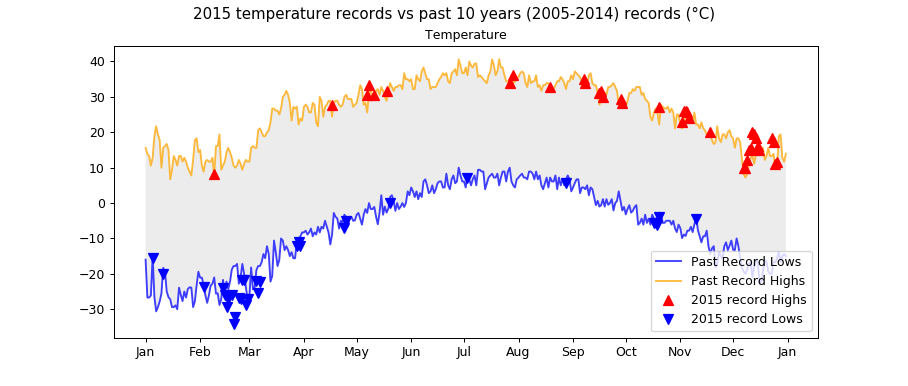

In [303]:
plt.suptitle("2015 temperature records vs past 10 years (2005-2014) records (°C)", fontsize=12)
plt.title("Temperature", fontsize=10)

In [304]:
#Past record temperatures
plt.plot(observation_axis, data_min.as_matrix(), '-', color='blue', ms=4, alpha=0.75) 
plt.plot(observation_axis, data_max.as_matrix(), '-', color='orange', ms=4, alpha=0.75)

In [305]:
#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r^',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'bv', 
         ms=8, alpha=1.0)

In [306]:
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [307]:
# matplotlib: change the current axis instance (i.e., gca())
plt.legend(['Past Record Lows', 'Past Record Highs', "2015 record Highs", "2015 record Lows"], loc=4, prop={'size':10})

In [308]:
plt.gca().fill_between(observation_axis, data_min, data_max, facecolor='grey', alpha=0.15)

Done By

k Balaji Subrahmanyam

assignment 2

Applied Plotting, Charting & Data Representation in Python